前机位和侧机位同时拍摄一段步态MP4视频，通过FFMPEG转换成两段步态AVI视频，作为输入数据

In [1]:
from mp4_to_avi import convert_mp4_to_avi
import glob

input_directory = "E://PycharmProjects/automated-gait-analysis/Part/Part01/"
output_directory = "E://PycharmProjects/automated-gait-analysis/Part/Part01/"
files = glob.glob(input_directory + '*.mp4')
for file_name in files:
    try:
        print(file_name)
        convert_mp4_to_avi(file_name, output_directory)
    except:
        raise

E://PycharmProjects/automated-gait-analysis/Part/Part01\execrise-front.mp4
E://PycharmProjects/automated-gait-analysis/Part/Part01\execrise-side.mp4


In [ ]:
# ==================================================================================
#                               POSE ESTIMATION
# ----------------------------------------------------------------------------------
#                           Input: Video x 2, Output: JSON
#               Given a front/back view and side view video of someone
#               walking, this will generate a json, describing the pose
#               via key-points in graph form, throughout every frame.
# ==================================================================================
# 使用yolo3_mobilenet1.0_coco预训练模型作为Object detector，使用AlphaPose作为Pose estimator，生成描述步态姿势的JSON文件，包括视频的每一帧。

In [2]:
from pose_estimation import estimate_poses
import time
import os

path = '.\\Part\\Part01\\'
if not os.path.exists(path):
    os.makedirs(path)

writeFile = path + 'Part01_pose.json'
if not os.path.exists(writeFile):
    f = open(writeFile, 'w')
    f.close()

start_time = time.time()
estimate_poses(path, writeFile)
print('Poses estimated and saved in', '\"' + writeFile + '\"', '[Time:',
            '{0:.2f}'.format(time.time() - start_time), 's]')

.\Part\Part01\*.avi
.\Part\Part01\execrise-front.avi
.\Part\Part01\execrise-side.avi
Capture pair (1/6) : ".\Part\Part01\execrise-side.avi" , ".\Part\Part01\execrise-front.avi"


Skipping  : 100%|█████████████████████████████████████████████████| 566/566 [06:01<00:00,  1.57it/s]


Poses estimated and saved in ".\Part\Part01\Part01_pose.json" [Time: 679.15 s]


In [ ]:
# ==================================================================================
#                               KINEMATICS_EXTRACTION
# ----------------------------------------------------------------------------------
#                      Input: Pose sequence, Output: Raw kinematics
#               Given a JSON describing poses throughout two video views,
#               Extracts kinematics and computes kinematics through joint angles
# ==================================================================================
#                                   Imports
# ==================================================================================

In [3]:
from kinematics_extraction import kinematics_extract

path = '.\\Part\\Part01\\'
readFile = path + 'Part01_pose.json'
writeFile = path + 'Part01_angles.json'
start_time = time.time()
kinematics_extract(readFile, writeFile)
print('Kinematics extracted and saved in', '\"' + writeFile + '\"', '[Time:',
        '{0:.2f}'.format(time.time() - start_time), 's]')

Kinematics extracted and saved in ".\Part\Part01\Part01_angles.json" [Time: 0.11 s]


E:\PycharmProjects\automated-gait-analysis\kinematics_extraction.py:137: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)


In [ ]:
# ==================================================================================
#                               KINEMATICS_PROCESSING
# ----------------------------------------------------------------------------------
#                    Input: Pose Json and Raw angles, Output: Gait Cycle graphs
#               Given a JSON describing angles of joints throughout a walk,
#               Smooth kinematics and averages to one standard gait cycle.
# ==================================================================================
# 根据姿势JSON和角度, 输出步态周期图

In [6]:
from kinematics_processing import kinematics_process

path = '.\\Part\\Part01\\'
poseFile = path + 'Part01_pose.json'
anglesFile = path + 'Part01_angles.json'
writeFile = path + 'Part01_gc.json'
start_time = time.time()
kinematics_process(poseFile, anglesFile, writeFile)
print('Kinematics processed and saved in', '\"' + writeFile + '\"', '[Time:',
              '{0:.2f}'.format(time.time() - start_time), 's]')

Kinematics processed and saved in ".\Part\Part01\Part01_gc.json" [Time: 0.11 s]


In [ ]:
# ==================================================================================
#                               VISUALIZER
# ----------------------------------------------------------------------------------
#                    Input: JSON, Output: Debugging plots / Gifs
#               Visualizes saved graph structure of poses, as well as
#               saved raw kinematics, and processed kinematics
# ==================================================================================
# 可视化

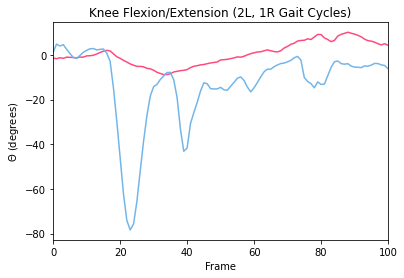

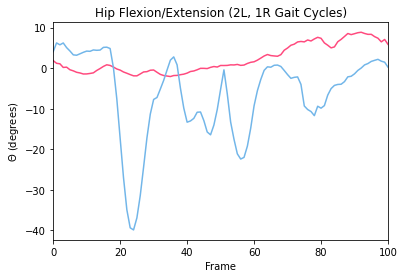

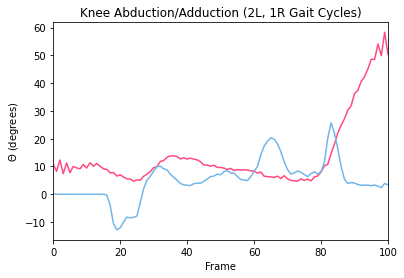

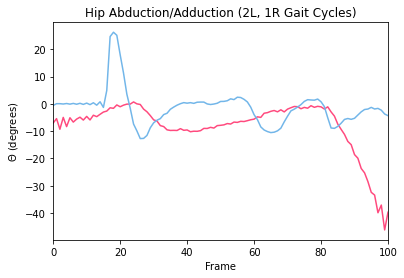

Visualizing poses...


100%|█████████████████████████████████████████████████████████████| 374/374 [02:55<00:00,  2.13it/s]


Saved as ".\Part\Part01\Part01-front.avi-PE.gif"
Visualizing flexion and extension...


100%|█████████████████████████████████████████████████████████████| 374/374 [01:26<00:00,  4.34it/s]


Saved as ".\Part\Part01\Part01-front.avi-FE.gif"
Visualizing flexion and extension...


100%|█████████████████████████████████████████████████████████████| 566/566 [02:05<00:00,  4.52it/s]


Saved as ".\Part\Part01\Part01-front.avi-AA.gif"


In [7]:
from visualizer import gif_flexext, gif_abdadd, gif_pose, plot_avg_gcLR_all, plot_raw_all_file

path = '.\\Part\\Part01\\'
poseFile = path + 'Part01_pose.json'
anglesFile = path + 'Part01_angles.json'
gcFile = path + 'Part01_gc.json'
plot_avg_gcLR_all(gcFile)

i = 1  # The gait number
gif_pose(poseFile, i, path)
gif_flexext(poseFile, anglesFile, i, path)
gif_abdadd(poseFile, anglesFile, i, path)